In [1]:
import Pkg
Pkg.activate("..")

  Activating project at `~/unsupervised_aav2`


In [2]:
using JLD2, PyPlot, GaussianMixtures, BioSeqInt, Flux, Distributions

In [3]:
include("utils.jl")

binomial_threshold (generic function with 1 method)

# Data

sequences with counts < 100 are filtered out

In [4]:
file_experiment1 = load("../my_data/data_experiment1.jld2")
sequences_experiment1 = file_experiment1["sequences_experiment1"]
counts_experiment1 = file_experiment1["counts_experiment1"];

In [5]:
file_experiment2 = load("../my_data/data_experiment2.jld2")
sequences_experiment2 = file_experiment2["sequences_experiment2"]
counts_experiment2 = file_experiment2["counts_experiment2"];

In [6]:
file_experiment3 = load("../my_data/data_experiment3.jld2")
sequences_experiment3 = file_experiment3["sequences_experiment3"]
counts_experiment3 = file_experiment3["counts_experiment3"];

# log selectivities

In [7]:
θexperiment1 = [log(counts_experiment1[m,2] / counts_experiment1[m,1]) for m in axes(counts_experiment1, 1)];

In [8]:
θexperiment2 = [log(counts_experiment2[m,2] / counts_experiment2[m,1]) for m in axes(counts_experiment2, 1)];

In [9]:
θexperiment3 = [log(counts_experiment3[m,2] / counts_experiment3[m,1]) for m in axes(counts_experiment3, 1)];

In [10]:
θexperiment1 = filter(isfinite, θexperiment1);
θexperiment2 = filter(isfinite, θexperiment2)
θexperiment3 = filter(isfinite, θexperiment3);

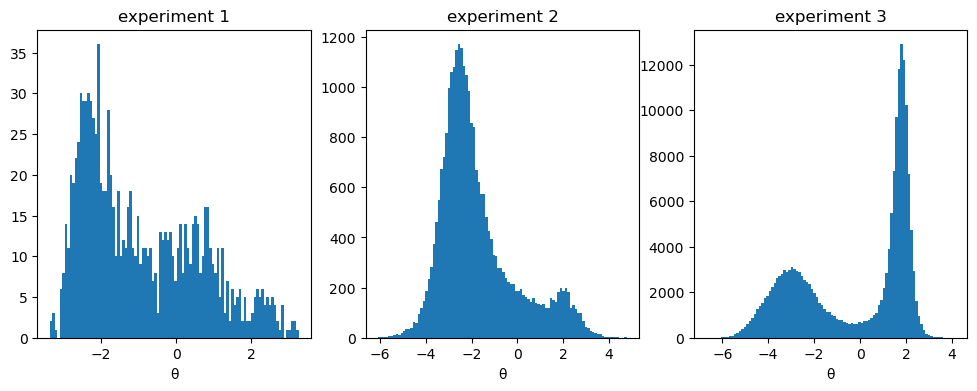

PyObject Text(0.5, 1.0, 'experiment 3')

In [11]:
fig, ax = subplots(1,3, figsize=(12,4))

ax[1].hist(filter(isfinite, θexperiment1), bins=100)
ax[1].set_xlabel("θ")
ax[1].set_title("experiment 1")

ax[2].hist(filter(isfinite, θexperiment2), bins=100)
ax[2].set_xlabel("θ")
ax[2].set_title("experiment 2")

ax[3].hist(filter(isfinite, θexperiment3), bins=100)
ax[3].set_xlabel("θ")
ax[3].set_title("experiment 3")

# thresholds fit

In [12]:
gmm1 = GMM(2,1)
gmm1.μ .+= randn(2,1)
gmm1.Σ .*= 1e-1;

In [13]:
em!(gmm1, reshape(θexperiment1, :, 1); nIter=20)

20-element Vector{Float64}:
 -6.115871045927949
 -1.7809959860114841
 -1.7683963325227838
 -1.76060520671308
 -1.752897688999435
 -1.7450246878516946
 -1.7371601569293569
 -1.729551235240428
 -1.7224468266071484
 -1.7160488236861045
 -1.7104705817618822
 -1.705723837617388
 -1.701742715149679
 -1.6984244036114766
 -1.6956615038282679
 -1.6933581548393708
 -1.691434537346593
 -1.689825946550774
 -1.6884801729009284
 -1.687354809894496

In [14]:
gmm2 = GMM(2,1)
gmm2.μ .+= randn(2,1)
gmm2.Σ .*= 1e-1;

In [15]:
em!(gmm2, reshape(θexperiment2, :, 1), nIter=20)

20-element Vector{Float64}:
 -23.4926826977167
  -1.765429541229265
  -1.7643286312516633
  -1.7635853837533013
  -1.7629972241527199
  -1.7625264219817383
  -1.7621475753604408
  -1.761841070257293
  -1.7615917350968135
  -1.7613878231559994
  -1.7612202062242661
  -1.761081756045957
  -1.760966875642782
  -1.7608711452533052
  -1.7607910545959986
  -1.760723799810221
  -1.7606671288196902
  -1.760619223006391
  -1.7605786061957533
  -1.7605440742665874

In [16]:
gmm3 = GMM(2,1)
gmm3.μ .+= randn(2,1)
gmm3.Σ .*= 1e-1;

In [17]:
em!(gmm3, reshape(θexperiment3, :, 1), nIter=20)

20-element Vector{Float64}:
 -17.34922418529283
  -1.744264952875757
  -1.7287960368255841
  -1.7225986437931609
  -1.7201747697221306
  -1.7192116233379113
  -1.7188171244048893
  -1.7186516650682517
  -1.7185811906641197
  -1.7185508724435037
  -1.7185377436589984
  -1.7185320336722487
  -1.7185295430784535
  -1.7185284546318655
  -1.7185279783463898
  -1.7185277697548003
  -1.7185276783495218
  -1.718527638280544
  -1.7185276207113045
  -1.718527613006369

In [18]:
function eval_gmm(gmm, x)
    g1 = Normal(gmm.μ[1,1], gmm.Σ[1,1])
    g2 = Normal(gmm.μ[2,1], gmm.Σ[2,1])
    g = MixtureModel([g1, g2], gmm.w)
    return pdf.(g, x)
end

eval_gmm (generic function with 1 method)

In [19]:
x1 = LinRange(-3,3,100)
x2 = LinRange(-7,5,100)
x3 = LinRange(-7,5,100);

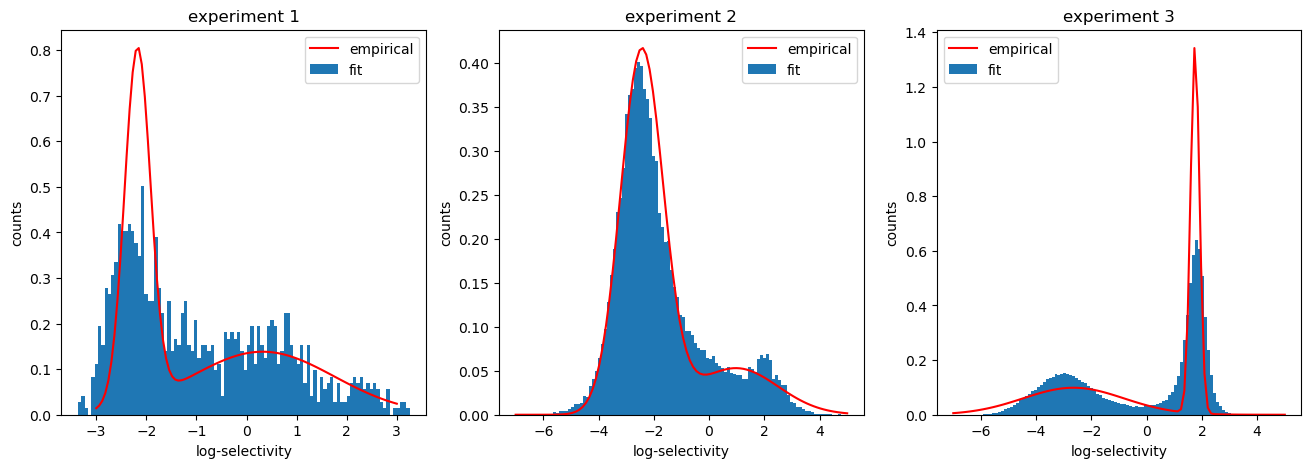

In [20]:
fig, ax = subplots(1,3, figsize=(16,5))

ax[1].hist(θexperiment1, bins=100, density=true)
ax[1].plot(x1, eval_gmm(gmm1, x1), color="red")
ax[1].set_xlabel("log-selectivity")
ax[1].set_ylabel("counts")
ax[1].legend(["empirical", "fit"])
ax[1].set_title("experiment 1")

ax[2].hist(θexperiment2, bins=100, density=true)
ax[2].plot(x2, eval_gmm(gmm2, x2), color="red")
ax[2].set_xlabel("log-selectivity")
ax[2].set_ylabel("counts")
ax[2].legend(["empirical", "fit"])
ax[2].set_title("experiment 2")

ax[3].hist(θexperiment3, bins=100, density=true)
ax[3].plot(x3, eval_gmm(gmm3, x3), color="red")
ax[3].set_xlabel("log-selectivity")
ax[3].set_ylabel("counts")
ax[3].legend(["empirical", "fit"])
ax[3].set_title("experiment 3")
savefig("../figures/fit.pdf", format="pdf")

In [ ]:
function intersections(gmm)
    m1 = gmm.μ[1,1]
    m2 = gmm.μ[2,1]
    s1 = gmm.Σ[1,1]
    s2 = gmm.Σ[2,1]
    w1 = gmm.w[1]
    w2 = gmm.w[2]
    
    a = s2^2 - s1^2
    b = m1*s2^2 - m2*s1^2
    c = m1^2*s2^2 - m2^2*s1^2 + 2*s1^2*s2^2*log((w2/w1)*(s1/s2))
    
    x1 = (b + sqrt(b^2-a*c))/a
    x2 = (b - sqrt(b^2-a*c))/a
    
    return x1,x2
end

In [ ]:
xa_1,xb_1 =intersections(gmm1)

In [ ]:
xa_2,xb_2 =intersections(gmm2)

In [ ]:
xa_3,xb_3 =intersections(gmm3)

In [ ]:
function find_valley(gmm, resolution::Int)
    xmin = gmm.μ[1,1]
    xmax = gmm.μ[2,1]
    r = LinRange(xmin, xmax, resolution)
    y = eval_gmm(gmm, r)
    xvalley = argmin(y)
    return r[xvalley]
end

In [ ]:
find_valley(gmm1, 100)

In [ ]:
find_valley(gmm2, 100)

In [ ]:
find_valley(gmm3, 100)